<h2>ST1504: Deep Learning</h2>
<h3>CA1 Part B</h3>
<small>Reused as DOAA modelling in Semester 2 CA2</small>
<p>Author: Ella</p>
<p>S/N: p2100733</p>

In [1]:
import tensorflow as tf 

tf.config.list_physical_devices("GPU")

2023-02-11 23:52:17.675164: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-11 23:52:18.184202: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-11 23:52:18.235984: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-11 23:52:18.236030: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

[]

# Imports

In [2]:
######## Modelling
import tensorflow as tf
import sklearn
 

####### Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

####### Data handling
import numpy as np 
import pandas as pd

####### Random
import random

In [3]:

%matplotlib inline 
from plotly.offline import  init_notebook_mode

init_notebook_mode(connected=True)


# LOAD DATA

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode="fine")


# EXPLORATORY DATA ANALYSIS

In [5]:
# Name of all classes in CIFAR-100
classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [6]:

# Check the shape of the array
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of samples in dataset
print(f"Train: {x_train.shape[0]}")
print(f"Test: {x_test.shape[0]}")

# Data format
print(type(x_train))
print(type(y_train))

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Train: 50000
Test: 10000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<AxesSubplot: xlabel='0'>

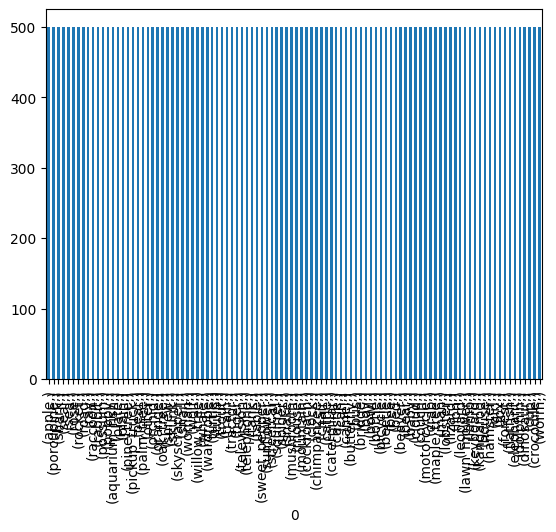

In [7]:
y_train_pd = pd.DataFrame(y_train)

for key, value in enumerate(classes):

    y_train_pd[y_train_pd == key] = value 



y_train_pd.value_counts().plot(kind = "bar")

Distribution of labels is even : No worries about imbalanced dataset

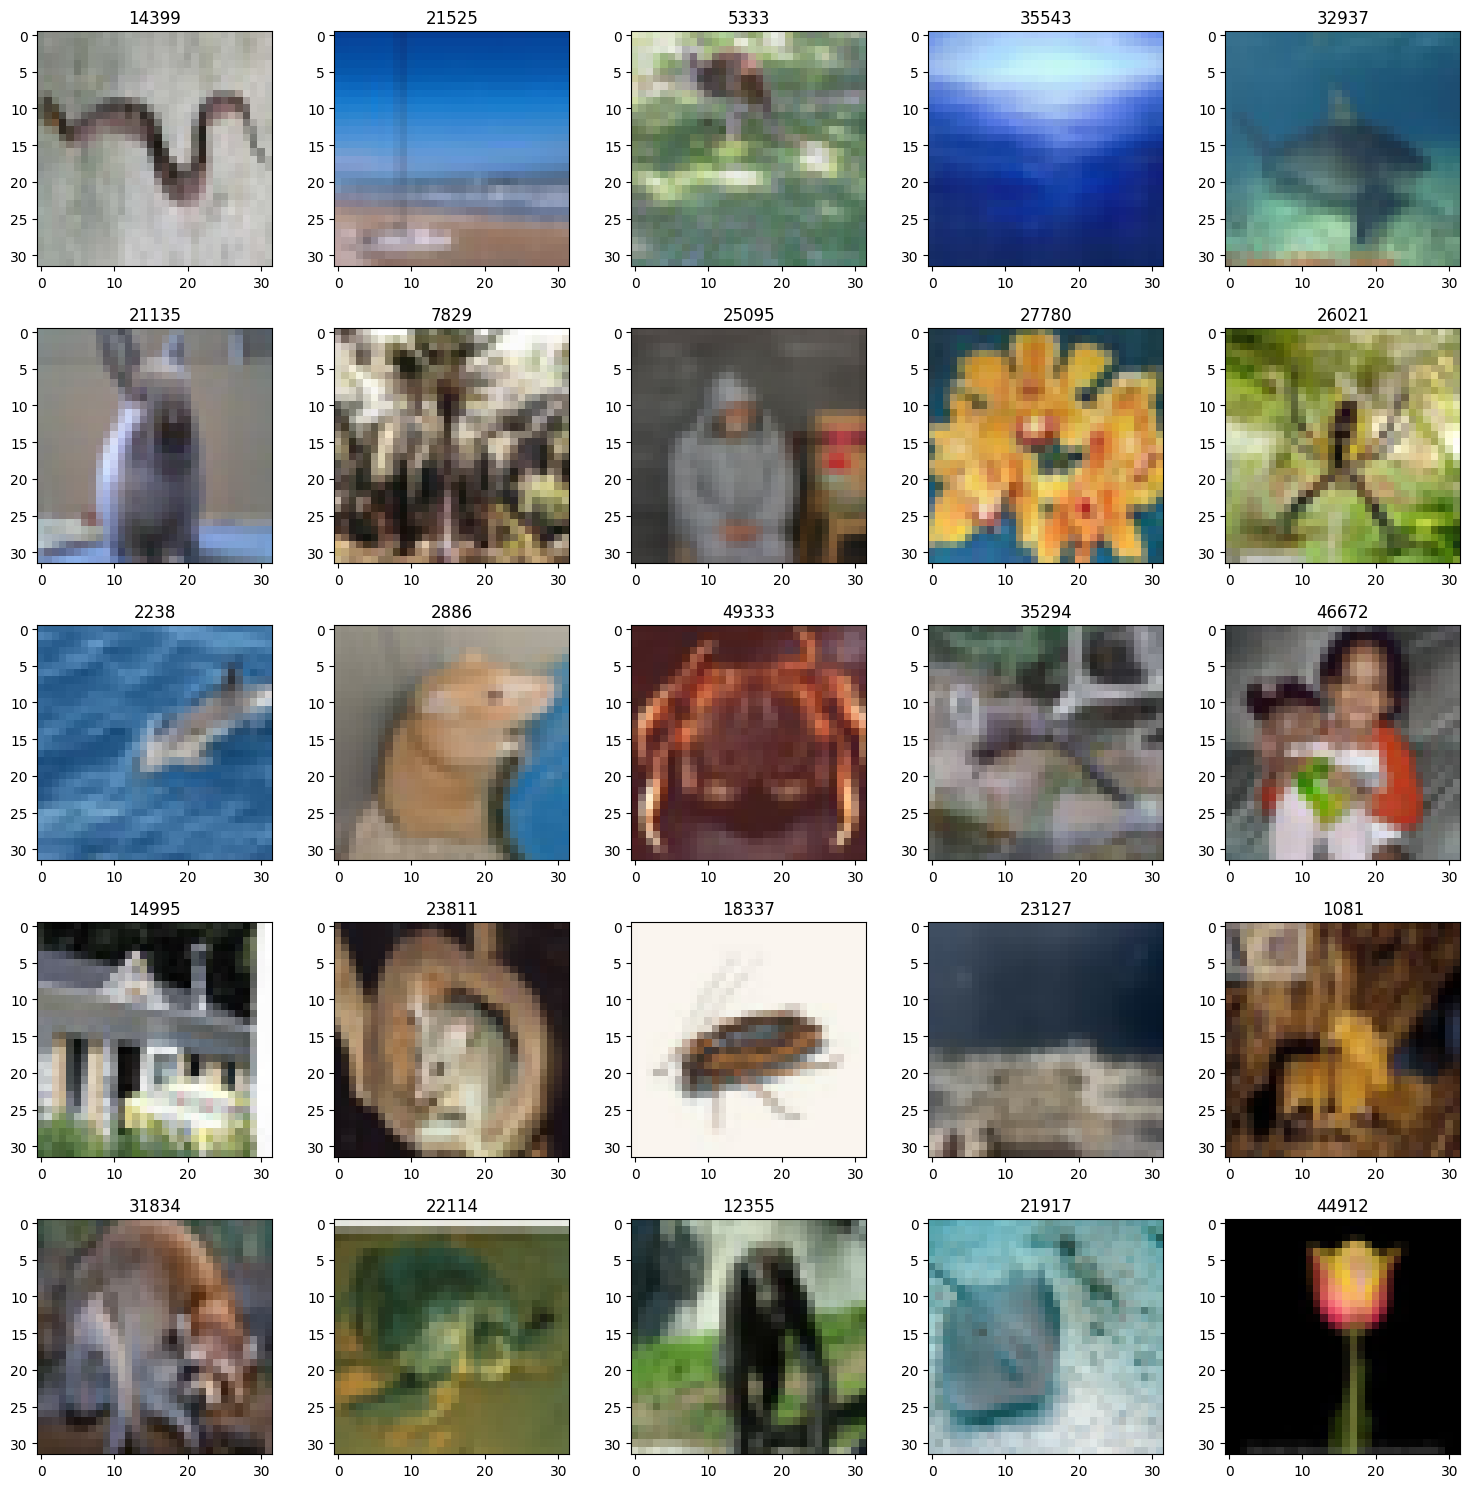

In [8]:

x_class_num = []
nrows = 5
ncols = 5

fig, ax = plt.subplots(
    nrows = nrows, 
    ncols = ncols , 
    figsize = (15,15)
)
fig.tight_layout()

for i in range(ncols): 
    for j in range(nrows): 
        x_select = random.randint(0, len(x_train))
        x_class_num.append(x_select)
        ax[j][i].imshow(x_train[x_select])
        ax[j][i].set_title(str(x_select))
        


# FEATURE ENGINEERING

## Spliting Data

In this subsection, I will be splitting train data into train data and validation data. 

Altogether, the 3 types of data I will have is train data (majority), validation data, and test data.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.30, random_state=42)

<BarContainer object of 3 artists>

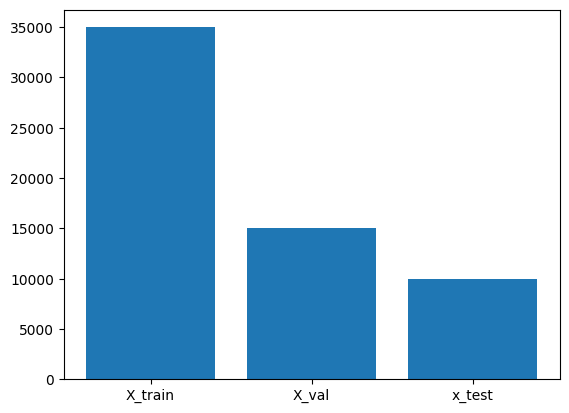

In [10]:
plt.bar(["X_train", "X_val", "x_test"],[len(X_train), len(X_val), len(x_test)],)

## Normalisation

Why is normalisation important? 
<br>
<br>

To prevent over compensating in the Neural Network in one weight dimension and under compensating in another. If the number is big (e.g. 255, 100), it won't take much for the weights to get out of control. For example, 255 * 2 = 510, while 255 / 255 * 2 is only 2. 

<small>Special thanks to <a href ='https://stats.stackexchange.com/a/185857'>this stack overflow answer</a> for helping me understand</small>

In [11]:
## Reshape to 32 * 32 

# Normalise data
X_train_normalised = X_train.astype('float32') / 255
X_val_normalised = X_val.astype('float32') / 255
X_test_normalised = x_test.astype('float32') / 255


## One Hot Encoding

In [12]:

# Transform labels to one hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train)
Y_train_onehot = tf.keras.utils.to_categorical(Y_train)
Y_val_onehot = tf.keras.utils.to_categorical(Y_val)
Y_test_onehot = tf.keras.utils.to_categorical(y_test)

In [13]:
print("cifar100 y_train_onehot shape:",y_train_onehot.shape)
print("cifar100 Y_train_onehot shape:",Y_train_onehot.shape)
print("cifar100 Y_val_onehot shape:",Y_val_onehot.shape)
print("cifar100 Y_test_onehot shape:",Y_test_onehot.shape)


cifar100 y_train_onehot shape: (50000, 100)
cifar100 Y_train_onehot shape: (35000, 100)
cifar100 Y_val_onehot shape: (15000, 100)
cifar100 Y_test_onehot shape: (10000, 100)


## Data Augmentation

In [14]:
'''
Thanks to : https://pyimagesearch.com/2021/06/28/data-augmentation-with-tf-data-and-tensorflow/
'''
augment_pipeline = tf.keras.models.Sequential([
	tf.keras.layers.Rescaling(scale=1.0 / 255),
	tf.keras.layers.RandomFlip("horizontal_and_vertical"),
	tf.keras.layers.RandomZoom(
		height_factor=(-0.05, -0.15),
		width_factor=(-0.05, -0.15)),
	tf.keras.layers.RandomRotation(0.3)
])

2023-02-11 23:52:37.284882: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:

'''
Thanks to: https://pyimagesearch.com/2021/06/14/a-gentle-introduction-to-tf-data-with-tensorflow/
'''
import tensorflow as tf 

'''
TRAINING DATA
'''
# build a TensorFlow dataset from the training data
train_data = tf.data.Dataset.from_tensor_slices((X_train_normalised, Y_train_onehot))


# build the data input pipeline
train_data = (train_data
	# Randomly fills a buffer of data with 1024 data points and randomly shuffles the data in the buffer. When data is pulled out of the buffer (such as when grabbing the next batch of data), TensorFlow automatically refills the buffer.
	.shuffle(1024)


	# take 
	.take(64)

	#  Efficiently caches the dataset for faster subsequent reads.
	.cache()

	# Tells tf.data to keep looping over our dataset (otherwise, once we ran out of data/end of an epoch, TensorFlow would error out).
	.repeat()
	# Returns a batch of 64 images and class labels in the batch.
	.batch(64)

	# DATA AUGMENTATION 
	.map(
		lambda x, y: 
			(augment_pipeline(x), y),
			num_parallel_calls=tf.data.AUTOTUNE,
		)


	# tells tf.data to prepare more data in the background while the current data is being processed
	.prefetch(tf.data.AUTOTUNE)
)




'''
validation data
'''
# build a TensorFlow dataset from the validationing data
validation_data = tf.data.Dataset.from_tensor_slices((X_val_normalised, Y_val_onehot))


# build the data input pipeline
validation_data = (validation_data
	# Randomly fills a buffer of data with 1024 data points and randomly shuffles the data in the buffer. When data is pulled out of the buffer (such as when grabbing the next batch of data), TensorFlow automatically refills the buffer.
	.shuffle(1024)

	#  Efficiently caches the dataset for faster subsequent reads.
	.cache()

	# Tells tf.data to keep looping over our dataset (otherwise, once we ran out of data/end of an epoch, TensorFlow would error out).
	.repeat()

	# Returns a batch of 64 images and class labels in the batch.
	.batch(64)


	# DATA AUGMENTATION 
	.map(
		lambda x, y: 
			(augment_pipeline(x), y),
			num_parallel_calls=tf.data.AUTOTUNE,
		)

		

	# tells tf.data to prepare more data in the background while the current data is being processed
	.prefetch(tf.data.AUTOTUNE)
)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


<small>Image Data Generator Docs: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator</small>

## Plot History

In [16]:
from plotly.subplots import make_subplots
def create_trace(x,y,ylabel,color):
        trace = plotly.graph_objs.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(hist):
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = make_subplots(
        rows=1,
        cols=2, 
        subplot_titles=(
            'Training and validation accuracy',
            'Training and validation loss'
        )
    )
    
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    plotly.offline.iplot(fig, filename='accuracy-loss')


# MODEL1 - V1


For the models, we will be using the Sequential model.  

- The Sequential model is a linear stack of layers, thus allowing for many layered model.

In [17]:
MODEL_NO = 1
VERSION_NO = 1 

In [18]:
model1_v1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),

    tf.keras.layers.Dense(100,activation='softmax'),
])

# Let's train the model1_v1 using RMSprop
model1_v1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    metrics=['accuracy']
)

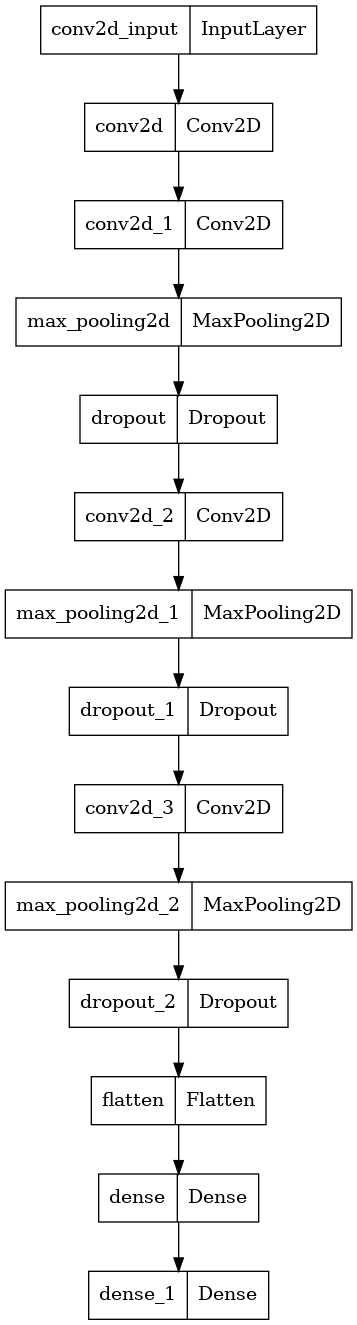

In [19]:
tf.keras.utils.plot_model(model1_v1, to_file = "./model/model1_v1.png")


### Fit Model

In [20]:



'''
RUNTIME WARNING:
    DATAGEN FLOW
        approximately ? minutes for 8 core cpu

    tf.data
        approximately 30 minutes on 8 core CPU
'''



model1_v1_history =  model1_v1.fit (
    #---------------------------------
    #    DATAGEN FLOW - Don't Use
    #---------------------------------
    # datagen.flow(
    #     x_train, 
    #     y_train_onehot, 
    #     batch_size=128,
    #     subset='training'
    # ),
    # validation_data=datagen.flow(
    #     x_train, 
    #     y_train_onehot,
    #     batch_size=128, 
    #     subset='validation'
    # ),

    # -------------------------------
    #    tf.data flow - Much Faster
    # -------------------------------
    train_data,
    validation_data = validation_data, 
    validation_steps=3,
    steps_per_epoch=100,


    epochs = 100,
    verbose = 1,
)



Epoch 1/100
100/100 [==============================] - 19s 171ms/step - loss: 4.4480 - accuracy: 0.0362 - val_loss: 4.8769 - val_accuracy: 0.0104
Epoch 2/100
  1/100 [..............................] - ETA: 14s - loss: 4.0014 - accuracy: 0.0625

2023-02-11 23:53:07.184511: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 158ms/step - loss: 3.9553 - accuracy: 0.0422 - val_loss: 5.7652 - val_accuracy: 0.0052
Epoch 3/100
  1/100 [..............................] - ETA: 13s - loss: 3.9194 - accuracy: 0.0469

2023-02-11 23:53:23.024819: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 3.9333 - accuracy: 0.0433 - val_loss: 5.5616 - val_accuracy: 0.0052
Epoch 4/100


2023-02-11 23:53:38.695950: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 3.9319 - accuracy: 0.0441 - val_loss: 5.7497 - val_accuracy: 0.0000e+00
Epoch 5/100


2023-02-11 23:53:54.361702: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 154ms/step - loss: 3.9266 - accuracy: 0.0441 - val_loss: 5.9567 - val_accuracy: 0.0000e+00
Epoch 6/100
  1/100 [..............................] - ETA: 13s - loss: 3.9393 - accuracy: 0.0469

2023-02-11 23:54:09.819336: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 3.9253 - accuracy: 0.0442 - val_loss: 5.9372 - val_accuracy: 0.0104
Epoch 7/100


2023-02-11 23:54:25.536616: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 3.9234 - accuracy: 0.0466 - val_loss: 5.9086 - val_accuracy: 0.0104
Epoch 8/100


2023-02-11 23:54:41.042518: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 3.9230 - accuracy: 0.0455 - val_loss: 5.7538 - val_accuracy: 0.0104
Epoch 9/100
  1/100 [..............................] - ETA: 14s - loss: 3.9220 - accuracy: 0.0469

2023-02-11 23:54:56.550715: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 3.9198 - accuracy: 0.0470 - val_loss: 6.0240 - val_accuracy: 0.0104
Epoch 10/100
  1/100 [..............................] - ETA: 14s - loss: 3.9134 - accuracy: 0.0469

2023-02-11 23:55:12.084463: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 3.9191 - accuracy: 0.0458 - val_loss: 5.9759 - val_accuracy: 0.0156
Epoch 11/100
  1/100 [..............................] - ETA: 14s - loss: 3.8917 - accuracy: 0.0469

2023-02-11 23:55:27.704902: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 3.9134 - accuracy: 0.0459 - val_loss: 6.2577 - val_accuracy: 0.0000e+00
Epoch 12/100
  1/100 [..............................] - ETA: 14s - loss: 3.8952 - accuracy: 0.0469

2023-02-11 23:55:43.337260: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 3.8929 - accuracy: 0.0516 - val_loss: 6.4967 - val_accuracy: 0.0052
Epoch 13/100
  1/100 [..............................] - ETA: 14s - loss: 3.8661 - accuracy: 0.0312

2023-02-11 23:55:58.967370: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 154ms/step - loss: 3.7627 - accuracy: 0.0814 - val_loss: 8.5782 - val_accuracy: 0.0000e+00
Epoch 14/100


2023-02-11 23:56:14.403967: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 3.4071 - accuracy: 0.1042 - val_loss: 14.2070 - val_accuracy: 0.0208
Epoch 15/100
  1/100 [..............................] - ETA: 14s - loss: 3.3194 - accuracy: 0.0781

2023-02-11 23:56:30.198269: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 3.0518 - accuracy: 0.1605 - val_loss: 17.8895 - val_accuracy: 0.0365
Epoch 16/100
  1/100 [..............................] - ETA: 13s - loss: 2.9403 - accuracy: 0.1875

2023-02-11 23:56:45.742668: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 2.7075 - accuracy: 0.2336 - val_loss: 23.9302 - val_accuracy: 0.0156
Epoch 17/100
  1/100 [..............................] - ETA: 14s - loss: 2.5683 - accuracy: 0.2344

2023-02-11 23:57:01.379972: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 155ms/step - loss: 2.4246 - accuracy: 0.2973 - val_loss: 24.8241 - val_accuracy: 0.0208
Epoch 18/100


2023-02-11 23:57:16.864636: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 155ms/step - loss: 2.1412 - accuracy: 0.3666 - val_loss: 31.4021 - val_accuracy: 0.0312
Epoch 19/100
  1/100 [..............................] - ETA: 15s - loss: 2.0757 - accuracy: 0.3594

2023-02-11 23:57:32.364362: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 1.9037 - accuracy: 0.4203 - val_loss: 32.5525 - val_accuracy: 0.0156
Epoch 20/100
  1/100 [..............................] - ETA: 14s - loss: 1.7996 - accuracy: 0.4062

2023-02-11 23:57:48.045293: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 155ms/step - loss: 1.6854 - accuracy: 0.4747 - val_loss: 33.0512 - val_accuracy: 0.0260
Epoch 21/100
  1/100 [..............................] - ETA: 17s - loss: 1.6256 - accuracy: 0.5312

2023-02-11 23:58:03.501237: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 1.4592 - accuracy: 0.5367 - val_loss: 41.7293 - val_accuracy: 0.0156
Epoch 22/100
  1/100 [..............................] - ETA: 13s - loss: 1.2335 - accuracy: 0.6875

2023-02-11 23:58:19.046195: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 154ms/step - loss: 1.2498 - accuracy: 0.5905 - val_loss: 43.0491 - val_accuracy: 0.0312
Epoch 23/100
  1/100 [..............................] - ETA: 13s - loss: 1.1443 - accuracy: 0.6406

2023-02-11 23:58:34.455877: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 155ms/step - loss: 1.0868 - accuracy: 0.6445 - val_loss: 50.9693 - val_accuracy: 0.0000e+00
Epoch 24/100
  1/100 [..............................] - ETA: 15s - loss: 0.8393 - accuracy: 0.7969

2023-02-11 23:58:49.902284: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 153ms/step - loss: 0.9454 - accuracy: 0.6853 - val_loss: 44.7569 - val_accuracy: 0.0208
Epoch 25/100


2023-02-11 23:59:05.249645: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.8236 - accuracy: 0.7273 - val_loss: 53.5636 - val_accuracy: 0.0052
Epoch 26/100
  1/100 [..............................] - ETA: 13s - loss: 0.6585 - accuracy: 0.7812

2023-02-11 23:59:20.908997: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.7504 - accuracy: 0.7500 - val_loss: 59.4583 - val_accuracy: 0.0052
Epoch 27/100
  1/100 [..............................] - ETA: 16s - loss: 0.7835 - accuracy: 0.7656

2023-02-11 23:59:36.505773: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.6540 - accuracy: 0.7825 - val_loss: 54.8561 - val_accuracy: 0.0156
Epoch 28/100
  1/100 [..............................] - ETA: 14s - loss: 0.6048 - accuracy: 0.7656

2023-02-11 23:59:52.106878: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 155ms/step - loss: 0.6089 - accuracy: 0.8006 - val_loss: 54.2961 - val_accuracy: 0.0260
Epoch 29/100
  1/100 [..............................] - ETA: 14s - loss: 0.4945 - accuracy: 0.8125

2023-02-12 00:00:07.600553: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.5157 - accuracy: 0.8288 - val_loss: 56.0934 - val_accuracy: 0.0000e+00
Epoch 30/100


2023-02-12 00:00:23.283630: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 0.4560 - accuracy: 0.8422 - val_loss: 58.7934 - val_accuracy: 0.0052
Epoch 31/100
  1/100 [..............................] - ETA: 14s - loss: 0.3777 - accuracy: 0.8594

2023-02-12 00:00:38.851045: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 155ms/step - loss: 0.4160 - accuracy: 0.8594 - val_loss: 55.1110 - val_accuracy: 0.0365
Epoch 32/100
  1/100 [..............................] - ETA: 14s - loss: 0.4599 - accuracy: 0.8125

2023-02-12 00:00:54.309632: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 0.3778 - accuracy: 0.8725 - val_loss: 60.8494 - val_accuracy: 0.0312
Epoch 33/100
  1/100 [..............................] - ETA: 14s - loss: 0.4340 - accuracy: 0.8906

2023-02-12 00:01:09.828904: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.3482 - accuracy: 0.8822 - val_loss: 68.9839 - val_accuracy: 0.0208
Epoch 34/100
  1/100 [..............................] - ETA: 14s - loss: 0.3829 - accuracy: 0.8594

2023-02-12 00:01:25.570258: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.3319 - accuracy: 0.8838 - val_loss: 71.5455 - val_accuracy: 0.0156
Epoch 35/100
  1/100 [..............................] - ETA: 13s - loss: 0.2391 - accuracy: 0.8906

2023-02-12 00:01:41.252097: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.2910 - accuracy: 0.8963 - val_loss: 74.1016 - val_accuracy: 0.0104
Epoch 36/100


2023-02-12 00:01:56.830972: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.2652 - accuracy: 0.9116 - val_loss: 72.9971 - val_accuracy: 0.0208
Epoch 37/100
  1/100 [..............................] - ETA: 14s - loss: 0.2016 - accuracy: 0.9375

2023-02-12 00:02:12.482774: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 155ms/step - loss: 0.2504 - accuracy: 0.9116 - val_loss: 75.8859 - val_accuracy: 0.0208
Epoch 38/100
  1/100 [..............................] - ETA: 14s - loss: 0.2689 - accuracy: 0.8750

2023-02-12 00:02:27.962607: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 155ms/step - loss: 0.2162 - accuracy: 0.9300 - val_loss: 65.9719 - val_accuracy: 0.0104
Epoch 39/100
  1/100 [..............................] - ETA: 14s - loss: 0.2425 - accuracy: 0.8906

2023-02-12 00:02:43.445732: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 0.2139 - accuracy: 0.9289 - val_loss: 73.5500 - val_accuracy: 0.0260
Epoch 40/100
  1/100 [..............................] - ETA: 14s - loss: 0.3425 - accuracy: 0.9062

2023-02-12 00:02:58.972351: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.1928 - accuracy: 0.9316 - val_loss: 72.1755 - val_accuracy: 0.0156
Epoch 41/100
  1/100 [..............................] - ETA: 15s - loss: 0.1056 - accuracy: 0.9688

2023-02-12 00:03:14.577244: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 0.1884 - accuracy: 0.9367 - val_loss: 72.7490 - val_accuracy: 0.0260
Epoch 42/100
  1/100 [..............................] - ETA: 14s - loss: 0.1304 - accuracy: 0.9375

2023-02-12 00:03:30.120628: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.1719 - accuracy: 0.9461 - val_loss: 69.9273 - val_accuracy: 0.0365
Epoch 43/100
  1/100 [..............................] - ETA: 14s - loss: 0.1216 - accuracy: 0.9531

2023-02-12 00:03:45.807961: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.1570 - accuracy: 0.9511 - val_loss: 87.3320 - val_accuracy: 0.0052
Epoch 44/100
  1/100 [..............................] - ETA: 14s - loss: 0.0886 - accuracy: 0.9688

2023-02-12 00:04:01.474581: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.1565 - accuracy: 0.9500 - val_loss: 72.9072 - val_accuracy: 0.0052
Epoch 45/100
  1/100 [..............................] - ETA: 15s - loss: 0.2740 - accuracy: 0.9062

2023-02-12 00:04:17.142581: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 154ms/step - loss: 0.1337 - accuracy: 0.9592 - val_loss: 84.2686 - val_accuracy: 0.0208
Epoch 46/100
  1/100 [..............................] - ETA: 14s - loss: 0.1299 - accuracy: 0.9688

2023-02-12 00:04:32.516784: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 154ms/step - loss: 0.1244 - accuracy: 0.9639 - val_loss: 68.6002 - val_accuracy: 0.0052
Epoch 47/100
  1/100 [..............................] - ETA: 13s - loss: 0.0955 - accuracy: 0.9688

2023-02-12 00:04:47.936323: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 155ms/step - loss: 0.1087 - accuracy: 0.9686 - val_loss: 79.0905 - val_accuracy: 0.0104
Epoch 48/100
  1/100 [..............................] - ETA: 14s - loss: 0.0752 - accuracy: 0.9844

2023-02-12 00:05:03.428606: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.1079 - accuracy: 0.9650 - val_loss: 84.8376 - val_accuracy: 0.0104
Epoch 49/100
  1/100 [..............................] - ETA: 14s - loss: 0.0634 - accuracy: 0.9844

2023-02-12 00:05:19.068278: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.1085 - accuracy: 0.9667 - val_loss: 78.8366 - val_accuracy: 0.0260
Epoch 50/100
  1/100 [..............................] - ETA: 14s - loss: 0.1186 - accuracy: 0.9844

2023-02-12 00:05:34.745156: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0969 - accuracy: 0.9684 - val_loss: 92.7386 - val_accuracy: 0.0104
Epoch 51/100
  1/100 [..............................] - ETA: 13s - loss: 0.0398 - accuracy: 1.0000

2023-02-12 00:05:50.420348: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 154ms/step - loss: 0.0808 - accuracy: 0.9745 - val_loss: 74.7096 - val_accuracy: 0.0104
Epoch 52/100
  1/100 [..............................] - ETA: 14s - loss: 0.0563 - accuracy: 0.9844

2023-02-12 00:06:05.817510: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 0.0813 - accuracy: 0.9778 - val_loss: 77.4134 - val_accuracy: 0.0365
Epoch 53/100
  1/100 [..............................] - ETA: 14s - loss: 0.0569 - accuracy: 0.9688

2023-02-12 00:06:21.350575: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0841 - accuracy: 0.9761 - val_loss: 89.1467 - val_accuracy: 0.0156
Epoch 54/100
  1/100 [..............................] - ETA: 14s - loss: 0.0334 - accuracy: 1.0000

2023-02-12 00:06:36.989117: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0818 - accuracy: 0.9762 - val_loss: 90.2027 - val_accuracy: 0.0156
Epoch 55/100
  1/100 [..............................] - ETA: 12s - loss: 0.1236 - accuracy: 0.9375

2023-02-12 00:06:52.557882: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0718 - accuracy: 0.9769 - val_loss: 91.5177 - val_accuracy: 0.0052
Epoch 56/100
  1/100 [..............................] - ETA: 13s - loss: 0.0442 - accuracy: 0.9844

2023-02-12 00:07:08.151768: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0633 - accuracy: 0.9808 - val_loss: 94.0484 - val_accuracy: 0.0000e+00
Epoch 57/100


2023-02-12 00:07:23.801918: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0667 - accuracy: 0.9767 - val_loss: 82.3524 - val_accuracy: 0.0208
Epoch 58/100
  1/100 [..............................] - ETA: 14s - loss: 0.0834 - accuracy: 0.9688

2023-02-12 00:07:39.498160: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0649 - accuracy: 0.9798 - val_loss: 79.3815 - val_accuracy: 0.0260
Epoch 59/100
  1/100 [..............................] - ETA: 14s - loss: 0.0519 - accuracy: 0.9844

2023-02-12 00:07:55.041128: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 0.0571 - accuracy: 0.9822 - val_loss: 93.4649 - val_accuracy: 0.0104
Epoch 60/100


2023-02-12 00:08:10.547234: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 154ms/step - loss: 0.0585 - accuracy: 0.9830 - val_loss: 98.8435 - val_accuracy: 0.0052
Epoch 61/100
  1/100 [..............................] - ETA: 14s - loss: 0.0359 - accuracy: 0.9844

2023-02-12 00:08:25.989750: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 154ms/step - loss: 0.0543 - accuracy: 0.9837 - val_loss: 88.0136 - val_accuracy: 0.0104
Epoch 62/100
  1/100 [..............................] - ETA: 14s - loss: 0.0192 - accuracy: 1.0000

2023-02-12 00:08:41.444342: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 154ms/step - loss: 0.0497 - accuracy: 0.9839 - val_loss: 95.0619 - val_accuracy: 0.0104
Epoch 63/100
  1/100 [..............................] - ETA: 14s - loss: 0.0407 - accuracy: 0.9688

2023-02-12 00:08:56.886966: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 154ms/step - loss: 0.0468 - accuracy: 0.9858 - val_loss: 89.8234 - val_accuracy: 0.0052
Epoch 64/100
  1/100 [..............................] - ETA: 14s - loss: 0.0496 - accuracy: 0.9844

2023-02-12 00:09:12.312870: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 155ms/step - loss: 0.0551 - accuracy: 0.9831 - val_loss: 88.6795 - val_accuracy: 0.0156
Epoch 65/100
  1/100 [..............................] - ETA: 14s - loss: 0.0872 - accuracy: 0.9844

2023-02-12 00:09:27.800568: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0538 - accuracy: 0.9848 - val_loss: 94.8752 - val_accuracy: 0.0052
Epoch 66/100
  1/100 [..............................] - ETA: 14s - loss: 0.0449 - accuracy: 1.0000

2023-02-12 00:09:43.441191: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0439 - accuracy: 0.9889 - val_loss: 84.8764 - val_accuracy: 0.0156
Epoch 67/100
  1/100 [..............................] - ETA: 14s - loss: 0.0160 - accuracy: 1.0000

2023-02-12 00:09:59.128596: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 155ms/step - loss: 0.0473 - accuracy: 0.9853 - val_loss: 93.6437 - val_accuracy: 0.0208
Epoch 68/100
  1/100 [..............................] - ETA: 14s - loss: 0.0086 - accuracy: 1.0000

2023-02-12 00:10:14.606641: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0426 - accuracy: 0.9872 - val_loss: 98.6464 - val_accuracy: 0.0208
Epoch 69/100
  1/100 [..............................] - ETA: 14s - loss: 0.1300 - accuracy: 0.9375

2023-02-12 00:10:30.191112: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0420 - accuracy: 0.9867 - val_loss: 97.9918 - val_accuracy: 0.0156
Epoch 70/100
  1/100 [..............................] - ETA: 14s - loss: 0.0189 - accuracy: 0.9844

2023-02-12 00:10:45.801657: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 154ms/step - loss: 0.0398 - accuracy: 0.9878 - val_loss: 76.7784 - val_accuracy: 0.0260
Epoch 71/100
  1/100 [..............................] - ETA: 14s - loss: 0.0529 - accuracy: 0.9844

2023-02-12 00:11:01.245274: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 158ms/step - loss: 0.0384 - accuracy: 0.9861 - val_loss: 83.2400 - val_accuracy: 0.0156
Epoch 72/100
  1/100 [..............................] - ETA: 14s - loss: 0.0067 - accuracy: 1.0000

2023-02-12 00:11:16.987575: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 158ms/step - loss: 0.0318 - accuracy: 0.9912 - val_loss: 85.8688 - val_accuracy: 0.0052
Epoch 73/100
  1/100 [..............................] - ETA: 13s - loss: 0.0129 - accuracy: 1.0000

2023-02-12 00:11:32.746022: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 155ms/step - loss: 0.0386 - accuracy: 0.9891 - val_loss: 95.1156 - val_accuracy: 0.0208
Epoch 74/100
  1/100 [..............................] - ETA: 13s - loss: 0.0180 - accuracy: 0.9844

2023-02-12 00:11:48.250149: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0345 - accuracy: 0.9895 - val_loss: 88.5690 - val_accuracy: 0.0156
Epoch 75/100
  1/100 [..............................] - ETA: 18s - loss: 0.0146 - accuracy: 1.0000

2023-02-12 00:12:03.896980: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 0.0278 - accuracy: 0.9917 - val_loss: 92.9201 - val_accuracy: 0.0104
Epoch 76/100
  1/100 [..............................] - ETA: 14s - loss: 0.0054 - accuracy: 1.0000

2023-02-12 00:12:19.404645: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0371 - accuracy: 0.9884 - val_loss: 105.3039 - val_accuracy: 0.0365
Epoch 77/100
  1/100 [..............................] - ETA: 13s - loss: 0.1017 - accuracy: 0.9688

2023-02-12 00:12:34.957835: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 0.0300 - accuracy: 0.9911 - val_loss: 93.0303 - val_accuracy: 0.0208
Epoch 78/100


2023-02-12 00:12:50.471373: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 79.1816 - val_accuracy: 0.0260
Epoch 79/100
  1/100 [..............................] - ETA: 14s - loss: 0.0098 - accuracy: 1.0000

2023-02-12 00:13:05.993379: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0352 - accuracy: 0.9886 - val_loss: 105.4474 - val_accuracy: 0.0156
Epoch 80/100
  1/100 [..............................] - ETA: 14s - loss: 0.0026 - accuracy: 1.0000

2023-02-12 00:13:21.630177: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0281 - accuracy: 0.9900 - val_loss: 95.8119 - val_accuracy: 0.0260
Epoch 81/100


2023-02-12 00:13:37.215573: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 0.0236 - accuracy: 0.9936 - val_loss: 88.7624 - val_accuracy: 0.0104
Epoch 82/100
  1/100 [..............................] - ETA: 15s - loss: 0.0155 - accuracy: 0.9844

2023-02-12 00:13:52.790981: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 102.5001 - val_accuracy: 0.0208
Epoch 83/100
  1/100 [..............................] - ETA: 14s - loss: 0.0202 - accuracy: 0.9844

2023-02-12 00:14:08.356546: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0270 - accuracy: 0.9908 - val_loss: 101.1961 - val_accuracy: 0.0104
Epoch 84/100
  1/100 [..............................] - ETA: 14s - loss: 0.0059 - accuracy: 1.0000

2023-02-12 00:14:23.907497: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 91.8009 - val_accuracy: 0.0156
Epoch 85/100
  1/100 [..............................] - ETA: 14s - loss: 0.0101 - accuracy: 1.0000

2023-02-12 00:14:39.473922: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 155ms/step - loss: 0.0266 - accuracy: 0.9927 - val_loss: 85.1912 - val_accuracy: 0.0208
Epoch 86/100
  1/100 [..............................] - ETA: 14s - loss: 0.0042 - accuracy: 1.0000

2023-02-12 00:14:54.924149: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0266 - accuracy: 0.9912 - val_loss: 96.9620 - val_accuracy: 0.0312
Epoch 87/100
  1/100 [..............................] - ETA: 14s - loss: 0.0096 - accuracy: 1.0000

2023-02-12 00:15:10.567394: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0282 - accuracy: 0.9905 - val_loss: 96.0362 - val_accuracy: 0.0260
Epoch 88/100
  1/100 [..............................] - ETA: 15s - loss: 0.0573 - accuracy: 0.9531

2023-02-12 00:15:26.304889: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0277 - accuracy: 0.9930 - val_loss: 99.8663 - val_accuracy: 0.0312
Epoch 89/100
  1/100 [..............................] - ETA: 14s - loss: 0.0019 - accuracy: 1.0000

2023-02-12 00:15:41.874141: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0277 - accuracy: 0.9925 - val_loss: 85.9417 - val_accuracy: 0.0156
Epoch 90/100
  1/100 [..............................] - ETA: 13s - loss: 0.0089 - accuracy: 1.0000

2023-02-12 00:15:57.458443: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 155ms/step - loss: 0.0201 - accuracy: 0.9947 - val_loss: 102.8320 - val_accuracy: 0.0208
Epoch 91/100
  1/100 [..............................] - ETA: 14s - loss: 0.0171 - accuracy: 0.9844

2023-02-12 00:16:12.900709: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 155ms/step - loss: 0.0212 - accuracy: 0.9934 - val_loss: 98.1470 - val_accuracy: 0.0156
Epoch 92/100
  1/100 [..............................] - ETA: 14s - loss: 0.0055 - accuracy: 1.0000

2023-02-12 00:16:28.378459: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 0.0221 - accuracy: 0.9927 - val_loss: 83.3283 - val_accuracy: 0.0208
Epoch 93/100


2023-02-12 00:16:43.891805: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 0.0271 - accuracy: 0.9925 - val_loss: 94.1195 - val_accuracy: 0.0156
Epoch 94/100
  1/100 [..............................] - ETA: 14s - loss: 0.0263 - accuracy: 0.9844

2023-02-12 00:16:59.476452: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0218 - accuracy: 0.9928 - val_loss: 88.1578 - val_accuracy: 0.0260
Epoch 95/100
  1/100 [..............................] - ETA: 14s - loss: 0.1245 - accuracy: 0.9844

2023-02-12 00:17:15.070966: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0197 - accuracy: 0.9948 - val_loss: 91.8898 - val_accuracy: 0.0156
Epoch 96/100
  1/100 [..............................] - ETA: 14s - loss: 0.0181 - accuracy: 1.0000

2023-02-12 00:17:30.748275: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 98.4436 - val_accuracy: 0.0000e+00
Epoch 97/100
  1/100 [..............................] - ETA: 15s - loss: 0.0027 - accuracy: 1.0000

2023-02-12 00:17:46.413132: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0175 - accuracy: 0.9936 - val_loss: 97.4323 - val_accuracy: 0.0052
Epoch 98/100
  1/100 [..............................] - ETA: 14s - loss: 0.0053 - accuracy: 1.0000

2023-02-12 00:18:02.010315: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0204 - accuracy: 0.9941 - val_loss: 97.3823 - val_accuracy: 0.0156
Epoch 99/100
  1/100 [..............................] - ETA: 14s - loss: 0.0331 - accuracy: 0.9688

2023-02-12 00:18:17.720449: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 90.3564 - val_accuracy: 0.0365
Epoch 100/100
  1/100 [..............................] - ETA: 14s - loss: 0.0031 - accuracy: 1.0000

2023-02-12 00:18:33.357980: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0207 - accuracy: 0.9937 - val_loss: 103.2863 - val_accuracy: 0.0104


2023-02-12 00:18:48.915641: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### Save Model

In [21]:
filepath = f"./img_classifier_{MODEL_NO}/{VERSION_NO}/"
model1_v1.save(
    filepath=filepath, 
    save_format='tf',
)

INFO:tensorflow:Assets written to: ./img_classifier_1/1/assets


INFO:tensorflow:Assets written to: ./img_classifier_1/1/assets


In [22]:
plot_accuracy_and_loss(model1_v1_history.history)

# MODEL1 - V2

In [23]:
MODEL_NO = 1
VERSION_NO = 2

In [24]:
model1_v2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),

    tf.keras.layers.Dense(100,activation='softmax'),
])

# Let's train the model1_v2 using RMSprop
model1_v2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

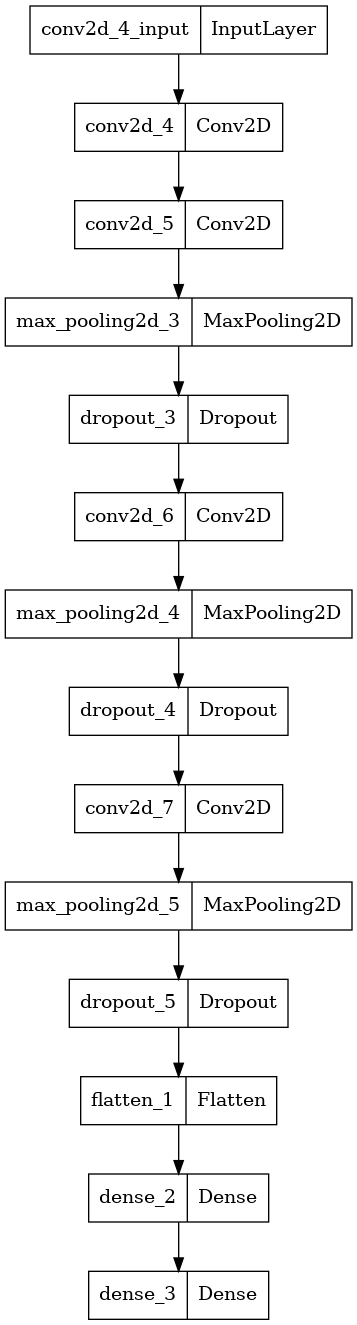

In [25]:
tf.keras.utils.plot_model(model1_v2, to_file = "./model/model1_v2.png")


### Fit Model

In [26]:



'''
RUNTIME WARNING:
    DATAGEN FLOW
        approximately 30 minutes for 8 core cpu

    tf.data
        approximately 13 minutes on 8 core CPU
'''



model1_v2_history =  model1_v2.fit (
    #---------------------------------
    #    DATAGEN FLOW - Don't Use
    #---------------------------------
    # datagen.flow(
    #     x_train, 
    #     y_train_onehot, 
    #     batch_size=128,
    #     subset='training'
    # ),
    # validation_data=datagen.flow(
    #     x_train, 
    #     y_train_onehot,
    #     batch_size=128, 
    #     subset='validation'
    # ),

    # -------------------------------
    #    tf.data flow - Much Faster
    # -------------------------------
    train_data,
    validation_data = validation_data, 
    validation_steps=3,
    steps_per_epoch=100,


    epochs = 50,
    verbose = 1,
)



Epoch 1/50
100/100 [==============================] - 18s 161ms/step - loss: 4.2327 - accuracy: 0.0428 - val_loss: 5.7314 - val_accuracy: 0.0000e+00
Epoch 2/50
  1/100 [..............................] - ETA: 14s - loss: 3.9367 - accuracy: 0.0469

2023-02-12 00:19:12.485501: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 162ms/step - loss: 3.9272 - accuracy: 0.0419 - val_loss: 6.1281 - val_accuracy: 0.0104
Epoch 3/50
  1/100 [..............................] - ETA: 15s - loss: 3.9375 - accuracy: 0.0312

2023-02-12 00:19:28.692496: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 163ms/step - loss: 3.9228 - accuracy: 0.0427 - val_loss: 5.8215 - val_accuracy: 0.0052
Epoch 4/50


2023-02-12 00:19:44.982541: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 163ms/step - loss: 3.9240 - accuracy: 0.0447 - val_loss: 6.0855 - val_accuracy: 0.0000e+00
Epoch 5/50
  1/100 [..............................] - ETA: 14s - loss: 3.9314 - accuracy: 0.0469

2023-02-12 00:20:01.300749: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 163ms/step - loss: 3.9160 - accuracy: 0.0469 - val_loss: 6.0821 - val_accuracy: 0.0104
Epoch 6/50
  1/100 [..............................] - ETA: 14s - loss: 3.9199 - accuracy: 0.0312

2023-02-12 00:20:17.553106: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 161ms/step - loss: 3.8682 - accuracy: 0.0527 - val_loss: 7.2523 - val_accuracy: 0.0208
Epoch 7/50


2023-02-12 00:20:33.603911: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 158ms/step - loss: 3.2888 - accuracy: 0.1284 - val_loss: 17.8807 - val_accuracy: 0.0208
Epoch 8/50
  1/100 [..............................] - ETA: 14s - loss: 2.6696 - accuracy: 0.1406

2023-02-12 00:20:49.410332: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 2.3296 - accuracy: 0.3041 - val_loss: 26.3651 - val_accuracy: 0.0156
Epoch 9/50
  1/100 [..............................] - ETA: 14s - loss: 1.7924 - accuracy: 0.5000

2023-02-12 00:21:05.141492: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 158ms/step - loss: 1.7869 - accuracy: 0.4403 - val_loss: 35.1420 - val_accuracy: 0.0312
Epoch 10/50
  1/100 [..............................] - ETA: 14s - loss: 1.6727 - accuracy: 0.5156

2023-02-12 00:21:20.961875: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 158ms/step - loss: 1.4018 - accuracy: 0.5505 - val_loss: 40.5625 - val_accuracy: 0.0312
Epoch 11/50
  1/100 [..............................] - ETA: 14s - loss: 1.1485 - accuracy: 0.5781

2023-02-12 00:21:36.730488: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 158ms/step - loss: 1.0894 - accuracy: 0.6422 - val_loss: 46.3978 - val_accuracy: 0.0156
Epoch 12/50
  1/100 [..............................] - ETA: 14s - loss: 0.9486 - accuracy: 0.6875

2023-02-12 00:21:52.498555: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.8731 - accuracy: 0.7077 - val_loss: 44.7139 - val_accuracy: 0.0260
Epoch 13/50


2023-02-12 00:22:08.153430: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.7634 - accuracy: 0.7469 - val_loss: 55.7477 - val_accuracy: 0.0000e+00
Epoch 14/50


2023-02-12 00:22:23.801749: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.6355 - accuracy: 0.7878 - val_loss: 61.0158 - val_accuracy: 0.0260
Epoch 15/50
  1/100 [..............................] - ETA: 15s - loss: 0.5132 - accuracy: 0.8281

2023-02-12 00:22:39.528885: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.5467 - accuracy: 0.8253 - val_loss: 65.1404 - val_accuracy: 0.0104
Epoch 16/50


2023-02-12 00:22:55.253958: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 158ms/step - loss: 0.4542 - accuracy: 0.8477 - val_loss: 69.2056 - val_accuracy: 0.0312
Epoch 17/50
  1/100 [..............................] - ETA: 13s - loss: 0.3605 - accuracy: 0.9062

2023-02-12 00:23:11.075404: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 158ms/step - loss: 0.4120 - accuracy: 0.8675 - val_loss: 69.4070 - val_accuracy: 0.0052
Epoch 18/50
  1/100 [..............................] - ETA: 14s - loss: 0.5072 - accuracy: 0.8750

2023-02-12 00:23:26.875096: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.3703 - accuracy: 0.8838 - val_loss: 61.6567 - val_accuracy: 0.0208
Epoch 19/50
  1/100 [..............................] - ETA: 15s - loss: 0.3265 - accuracy: 0.8906

2023-02-12 00:23:42.587887: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.3227 - accuracy: 0.8970 - val_loss: 72.9506 - val_accuracy: 0.0104
Epoch 20/50
  1/100 [..............................] - ETA: 14s - loss: 0.3344 - accuracy: 0.9062

2023-02-12 00:23:58.243853: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - ETA: 0s - loss: 0.2909 - accuracy: 0.9100

2023-02-12 00:24:13.927734: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 159ms/step - loss: 0.2909 - accuracy: 0.9100 - val_loss: 66.5888 - val_accuracy: 0.0156
Epoch 21/50
100/100 [==============================] - 15s 155ms/step - loss: 0.2612 - accuracy: 0.9158 - val_loss: 63.8873 - val_accuracy: 0.0104
Epoch 22/50
  1/100 [..............................] - ETA: 14s - loss: 0.1928 - accuracy: 0.9219

2023-02-12 00:24:29.651412: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 158ms/step - loss: 0.2426 - accuracy: 0.9247 - val_loss: 73.0557 - val_accuracy: 0.0156
Epoch 23/50
  1/100 [..............................] - ETA: 15s - loss: 0.2348 - accuracy: 0.9219

2023-02-12 00:24:45.400730: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.2043 - accuracy: 0.9375 - val_loss: 68.4284 - val_accuracy: 0.0156
Epoch 24/50
  1/100 [..............................] - ETA: 14s - loss: 0.1885 - accuracy: 0.9531

2023-02-12 00:25:01.133788: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 159ms/step - loss: 0.1919 - accuracy: 0.9386 - val_loss: 76.5720 - val_accuracy: 0.0208
Epoch 25/50
  1/100 [..............................] - ETA: 14s - loss: 0.1855 - accuracy: 0.9531

2023-02-12 00:25:17.044130: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.1897 - accuracy: 0.9398 - val_loss: 82.1629 - val_accuracy: 0.0312
Epoch 26/50
  1/100 [..............................] - ETA: 14s - loss: 0.1964 - accuracy: 0.9219

2023-02-12 00:25:32.771854: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.1621 - accuracy: 0.9481 - val_loss: 82.2054 - val_accuracy: 0.0104
Epoch 27/50
  1/100 [..............................] - ETA: 14s - loss: 0.1030 - accuracy: 0.9531

2023-02-12 00:25:48.327148: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 15s 155ms/step - loss: 0.1542 - accuracy: 0.9525 - val_loss: 79.3307 - val_accuracy: 0.0208
Epoch 28/50


2023-02-12 00:26:03.817561: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 155ms/step - loss: 0.1373 - accuracy: 0.9577 - val_loss: 72.7003 - val_accuracy: 0.0104
Epoch 29/50
  1/100 [..............................] - ETA: 14s - loss: 0.0837 - accuracy: 0.9844

2023-02-12 00:26:19.353423: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 158ms/step - loss: 0.1217 - accuracy: 0.9617 - val_loss: 74.0765 - val_accuracy: 0.0260
Epoch 30/50
  1/100 [..............................] - ETA: 14s - loss: 0.0892 - accuracy: 0.9844

2023-02-12 00:26:35.100821: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 158ms/step - loss: 0.1298 - accuracy: 0.9616 - val_loss: 81.8707 - val_accuracy: 0.0156
Epoch 31/50
  1/100 [..............................] - ETA: 13s - loss: 0.2613 - accuracy: 0.9062

2023-02-12 00:26:50.927410: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 158ms/step - loss: 0.1153 - accuracy: 0.9636 - val_loss: 86.1180 - val_accuracy: 0.0260
Epoch 32/50
  1/100 [..............................] - ETA: 14s - loss: 0.1045 - accuracy: 0.9844

2023-02-12 00:27:06.667560: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.1139 - accuracy: 0.9653 - val_loss: 82.2201 - val_accuracy: 0.0312
Epoch 33/50
  1/100 [..............................] - ETA: 15s - loss: 0.0652 - accuracy: 0.9688

2023-02-12 00:27:22.280079: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 158ms/step - loss: 0.1108 - accuracy: 0.9673 - val_loss: 82.5152 - val_accuracy: 0.0156
Epoch 34/50
  1/100 [..............................] - ETA: 15s - loss: 0.2048 - accuracy: 0.9531

2023-02-12 00:27:38.124111: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.1039 - accuracy: 0.9711 - val_loss: 83.0092 - val_accuracy: 0.0052
Epoch 35/50
  1/100 [..............................] - ETA: 13s - loss: 0.1070 - accuracy: 0.9688

2023-02-12 00:27:53.773095: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - ETA: 0s - loss: 0.0861 - accuracy: 0.9742

2023-02-12 00:28:09.490700: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 160ms/step - loss: 0.0861 - accuracy: 0.9742 - val_loss: 83.6391 - val_accuracy: 0.0052
Epoch 36/50
100/100 [==============================] - 16s 157ms/step - loss: 0.0979 - accuracy: 0.9700 - val_loss: 79.1584 - val_accuracy: 0.0208
Epoch 37/50
  1/100 [..............................] - ETA: 15s - loss: 0.0288 - accuracy: 1.0000

2023-02-12 00:28:25.399202: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0864 - accuracy: 0.9737 - val_loss: 96.0714 - val_accuracy: 0.0260
Epoch 38/50
  1/100 [..............................] - ETA: 14s - loss: 0.0574 - accuracy: 0.9844

2023-02-12 00:28:41.117357: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0831 - accuracy: 0.9737 - val_loss: 76.1452 - val_accuracy: 0.0208
Epoch 39/50
  1/100 [..............................] - ETA: 13s - loss: 0.1351 - accuracy: 0.9688

2023-02-12 00:28:56.862207: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0702 - accuracy: 0.9805 - val_loss: 92.3564 - val_accuracy: 0.0312
Epoch 40/50


2023-02-12 00:29:12.593973: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0646 - accuracy: 0.9834 - val_loss: 81.9683 - val_accuracy: 0.0260
Epoch 41/50
  1/100 [..............................] - ETA: 15s - loss: 0.0602 - accuracy: 0.9844

2023-02-12 00:29:28.304474: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 158ms/step - loss: 0.0629 - accuracy: 0.9802 - val_loss: 86.1036 - val_accuracy: 0.0156
Epoch 42/50
  1/100 [..............................] - ETA: 14s - loss: 0.0849 - accuracy: 0.9844

2023-02-12 00:29:44.065941: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0714 - accuracy: 0.9792 - val_loss: 95.2185 - val_accuracy: 0.0104
Epoch 43/50
  1/100 [..............................] - ETA: 14s - loss: 0.0322 - accuracy: 1.0000

2023-02-12 00:29:59.742868: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0672 - accuracy: 0.9811 - val_loss: 85.2825 - val_accuracy: 0.0260
Epoch 44/50
  1/100 [..............................] - ETA: 14s - loss: 0.0306 - accuracy: 1.0000

2023-02-12 00:30:15.364706: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0593 - accuracy: 0.9816 - val_loss: 88.4893 - val_accuracy: 0.0208
Epoch 45/50
  1/100 [..............................] - ETA: 15s - loss: 0.0145 - accuracy: 1.0000

2023-02-12 00:30:31.023220: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0655 - accuracy: 0.9825 - val_loss: 91.1283 - val_accuracy: 0.0208
Epoch 46/50
  1/100 [..............................] - ETA: 13s - loss: 0.0900 - accuracy: 0.9844

2023-02-12 00:30:46.697202: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0575 - accuracy: 0.9825 - val_loss: 81.9761 - val_accuracy: 0.0260
Epoch 47/50


2023-02-12 00:31:02.342031: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0722 - accuracy: 0.9781 - val_loss: 91.2463 - val_accuracy: 0.0260
Epoch 48/50
  1/100 [..............................] - ETA: 14s - loss: 0.1027 - accuracy: 0.9844

2023-02-12 00:31:18.120998: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 157ms/step - loss: 0.0693 - accuracy: 0.9809 - val_loss: 85.2323 - val_accuracy: 0.0052
Epoch 49/50


2023-02-12 00:31:33.835060: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 156ms/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 93.2935 - val_accuracy: 0.0208
Epoch 50/50
  1/100 [..............................] - ETA: 14s - loss: 0.0209 - accuracy: 1.0000

2023-02-12 00:31:49.473317: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 16s 158ms/step - loss: 0.0501 - accuracy: 0.9859 - val_loss: 78.9657 - val_accuracy: 0.0260


2023-02-12 00:32:05.240013: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### Save Model

In [27]:
filepath = f"./img_classifier_{MODEL_NO}/{VERSION_NO}/"
model1_v2.save(
    filepath=filepath, 
    save_format='tf',
)

INFO:tensorflow:Assets written to: ./img_classifier_1/2/assets


INFO:tensorflow:Assets written to: ./img_classifier_1/2/assets


### View History

In [28]:
plot_accuracy_and_loss(model1_v2_history.history)

# MODEL2 - V1

A more complexed model.

In [29]:
MODEL_NO = 2
VERSION_NO = 1

In [30]:
model2_v1 = tf.keras.models.Sequential([
        # ---------------------------------------------------
        #    HIDDEN LAYER 1
        # ---------------------------------------------------
        tf.keras.layers.Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(256,(3,3),padding='same'),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.2),


        # ---------------------------------------------------
        #    HIDDEN LAYER 2
        # ---------------------------------------------------
        tf.keras.layers.Conv2D(512,(3,3),padding='same'),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(512,(3,3),padding='same'),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.2),


        # ---------------------------------------------------
        #    HIDDEN LAYER 3
        # ---------------------------------------------------
        tf.keras.layers.Conv2D(512,(3,3),padding='same'),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(512,(3,3),padding='same'),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.2),


        # ---------------------------------------------------
        #    HIDDEN LAYER 4
        # ---------------------------------------------------
        tf.keras.layers.Conv2D(512,(3,3),padding='same'),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(512,(3,3),padding='same'),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.2),


        # ---------------------------------------------------
        #    DEEP LEARNING LAYER
        # ---------------------------------------------------
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(100,activation='softmax'),
])


# Configure the model for training
model2_v1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)


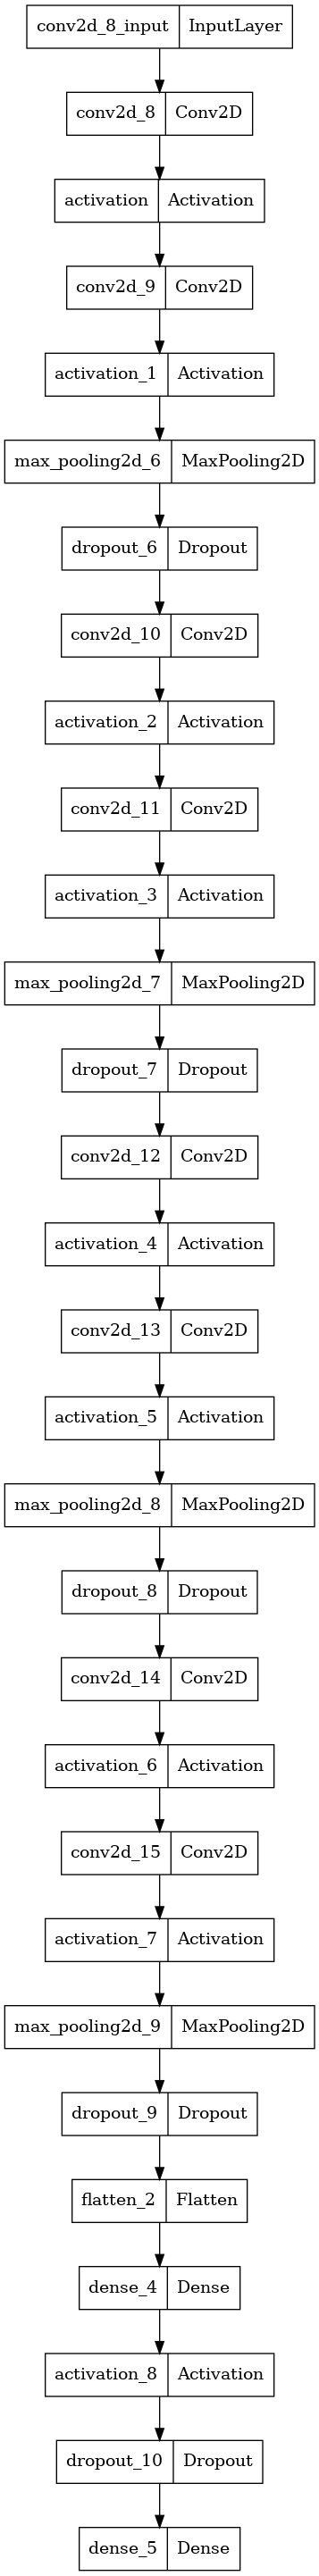

In [31]:
tf.keras.utils.plot_model(model2_v1, to_file = "./model/model2_v1.png")


### Fit Model

In [32]:



'''
RUNTIME WARNING:
    DATAGEN FLOW
        approximately ? minutes for 8 core cpu

    tf.data
        approximately 476 minutes on 8 core CPU
'''



model2_v1_history =  model2_v1.fit (
    #---------------------------------
    #    DATAGEN FLOW - Don't Use
    #---------------------------------
    # datagen.flow(
    #     x_train, 
    #     y_train_onehot, 
    #     batch_size=128,
    #     subset='training'
    # ),
    # validation_data=datagen.flow(
    #     x_train, 
    #     y_train_onehot,
    #     batch_size=128, 
    #     subset='validation'
    # ),

    # -------------------------------
    #    tf.data flow - Much Faster
    # -------------------------------
    train_data,
    validation_data = validation_data, 
    validation_steps=3,
    steps_per_epoch=100,


    epochs = 50,
    verbose = 1,
)



Epoch 1/50
100/100 [==============================] - 579s 6s/step - loss: 4.2683 - accuracy: 0.0416 - val_loss: 5.3992 - val_accuracy: 0.0104
Epoch 2/50


2023-02-12 00:41:49.018406: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 574s 6s/step - loss: 3.9738 - accuracy: 0.0383 - val_loss: 6.0467 - val_accuracy: 0.0156
Epoch 3/50


2023-02-12 00:51:22.597346: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 571s 6s/step - loss: 3.9598 - accuracy: 0.0361 - val_loss: 5.9209 - val_accuracy: 0.0104
Epoch 4/50


2023-02-12 01:00:53.620551: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 573s 6s/step - loss: 3.9449 - accuracy: 0.0448 - val_loss: 5.9663 - val_accuracy: 0.0052
Epoch 5/50


2023-02-12 01:10:26.236626: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 569s 6s/step - loss: 3.9389 - accuracy: 0.0422 - val_loss: 6.1588 - val_accuracy: 0.0104
Epoch 6/50


2023-02-12 01:19:55.536177: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 569s 6s/step - loss: 3.9382 - accuracy: 0.0441 - val_loss: 6.1469 - val_accuracy: 0.0156
Epoch 7/50


2023-02-12 01:29:24.435893: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 573s 6s/step - loss: 3.9354 - accuracy: 0.0420 - val_loss: 6.3107 - val_accuracy: 0.0156
Epoch 8/50


2023-02-12 01:38:57.630662: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 575s 6s/step - loss: 3.9304 - accuracy: 0.0422 - val_loss: 6.6090 - val_accuracy: 0.0156
Epoch 9/50


2023-02-12 01:48:32.815588: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 572s 6s/step - loss: 3.9304 - accuracy: 0.0427 - val_loss: 6.2862 - val_accuracy: 0.0208
Epoch 10/50


2023-02-12 01:58:04.972857: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 569s 6s/step - loss: 3.9306 - accuracy: 0.0445 - val_loss: 6.3140 - val_accuracy: 0.0104
Epoch 11/50


2023-02-12 02:07:34.102352: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 570s 6s/step - loss: 3.9311 - accuracy: 0.0431 - val_loss: 6.3159 - val_accuracy: 0.0156
Epoch 12/50


2023-02-12 02:17:03.824844: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 575s 6s/step - loss: 3.9265 - accuracy: 0.0439 - val_loss: 6.4097 - val_accuracy: 0.0104
Epoch 13/50


2023-02-12 02:26:39.123162: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 571s 6s/step - loss: 3.9284 - accuracy: 0.0447 - val_loss: 6.3124 - val_accuracy: 0.0104
Epoch 14/50


2023-02-12 02:36:10.135024: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 574s 6s/step - loss: 3.9243 - accuracy: 0.0461 - val_loss: 6.4563 - val_accuracy: 0.0156
Epoch 15/50


2023-02-12 02:45:44.151350: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 569s 6s/step - loss: 3.9258 - accuracy: 0.0456 - val_loss: 6.1337 - val_accuracy: 0.0104
Epoch 16/50


2023-02-12 02:55:13.263330: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 573s 6s/step - loss: 3.9247 - accuracy: 0.0442 - val_loss: 6.3710 - val_accuracy: 0.0156
Epoch 17/50


2023-02-12 03:04:46.097490: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 576s 6s/step - loss: 3.9262 - accuracy: 0.0463 - val_loss: 6.5671 - val_accuracy: 0.0156
Epoch 18/50


2023-02-12 03:14:21.702938: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 578s 6s/step - loss: 3.9235 - accuracy: 0.0450 - val_loss: 6.9109 - val_accuracy: 0.0052
Epoch 19/50


2023-02-12 03:23:59.736783: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 579s 6s/step - loss: 3.9241 - accuracy: 0.0461 - val_loss: 6.6648 - val_accuracy: 0.0052
Epoch 20/50


2023-02-12 03:33:39.064759: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 576s 6s/step - loss: 3.9235 - accuracy: 0.0458 - val_loss: 6.7572 - val_accuracy: 0.0000e+00
Epoch 21/50


2023-02-12 03:43:15.358817: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 568s 6s/step - loss: 3.9219 - accuracy: 0.0458 - val_loss: 6.9926 - val_accuracy: 0.0052
Epoch 22/50


2023-02-12 03:52:43.564636: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 571s 6s/step - loss: 3.9228 - accuracy: 0.0456 - val_loss: 6.9258 - val_accuracy: 0.0104
Epoch 23/50


2023-02-12 04:02:14.139331: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 574s 6s/step - loss: 3.9232 - accuracy: 0.0475 - val_loss: 6.4796 - val_accuracy: 0.0052
Epoch 24/50


2023-02-12 04:11:48.575282: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 569s 6s/step - loss: 3.9213 - accuracy: 0.0453 - val_loss: 6.5277 - val_accuracy: 0.0156
Epoch 25/50


2023-02-12 04:21:18.025280: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 570s 6s/step - loss: 3.9223 - accuracy: 0.0472 - val_loss: 6.9164 - val_accuracy: 0.0208
Epoch 26/50


2023-02-12 04:30:48.183346: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 572s 6s/step - loss: 3.9226 - accuracy: 0.0461 - val_loss: 6.5841 - val_accuracy: 0.0104
Epoch 27/50


2023-02-12 04:40:19.926296: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 578s 6s/step - loss: 3.9207 - accuracy: 0.0464 - val_loss: 6.6532 - val_accuracy: 0.0104
Epoch 28/50


2023-02-12 04:49:57.561202: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 570s 6s/step - loss: 3.9224 - accuracy: 0.0458 - val_loss: 6.5117 - val_accuracy: 0.0156
Epoch 29/50


2023-02-12 04:59:27.888756: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 573s 6s/step - loss: 3.9223 - accuracy: 0.0466 - val_loss: 6.2256 - val_accuracy: 0.0052
Epoch 30/50


2023-02-12 05:09:01.213266: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 571s 6s/step - loss: 3.9206 - accuracy: 0.0477 - val_loss: 7.3194 - val_accuracy: 0.0104
Epoch 31/50


2023-02-12 05:18:31.769066: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 570s 6s/step - loss: 3.9211 - accuracy: 0.0467 - val_loss: 6.9515 - val_accuracy: 0.0052
Epoch 32/50


2023-02-12 05:28:01.988838: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 575s 6s/step - loss: 3.9198 - accuracy: 0.0461 - val_loss: 6.5784 - val_accuracy: 0.0208
Epoch 33/50


2023-02-12 05:37:36.888446: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 569s 6s/step - loss: 3.9201 - accuracy: 0.0463 - val_loss: 6.9424 - val_accuracy: 0.0052
Epoch 34/50


2023-02-12 05:47:05.976311: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 572s 6s/step - loss: 3.9215 - accuracy: 0.0467 - val_loss: 6.8843 - val_accuracy: 0.0208
Epoch 35/50


2023-02-12 05:56:38.276913: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 572s 6s/step - loss: 3.9205 - accuracy: 0.0464 - val_loss: 6.7268 - val_accuracy: 0.0104
Epoch 36/50


2023-02-12 06:06:10.680796: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 570s 6s/step - loss: 3.9210 - accuracy: 0.0464 - val_loss: 6.6962 - val_accuracy: 0.0052
Epoch 37/50


2023-02-12 06:15:40.925992: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 572s 6s/step - loss: 3.9206 - accuracy: 0.0467 - val_loss: 6.8146 - val_accuracy: 0.0000e+00
Epoch 38/50


2023-02-12 06:25:12.865060: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 573s 6s/step - loss: 3.9170 - accuracy: 0.0469 - val_loss: 7.1513 - val_accuracy: 0.0052
Epoch 39/50


2023-02-12 06:34:46.072574: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 574s 6s/step - loss: 3.9209 - accuracy: 0.0469 - val_loss: 6.9638 - val_accuracy: 0.0104
Epoch 40/50


2023-02-12 06:44:20.306631: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 569s 6s/step - loss: 3.9184 - accuracy: 0.0467 - val_loss: 6.9310 - val_accuracy: 0.0052
Epoch 41/50


2023-02-12 06:53:49.179478: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 574s 6s/step - loss: 3.9203 - accuracy: 0.0467 - val_loss: 6.9323 - val_accuracy: 0.0104
Epoch 42/50


2023-02-12 07:03:23.120959: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 575s 6s/step - loss: 3.9169 - accuracy: 0.0464 - val_loss: 6.9372 - val_accuracy: 0.0052
Epoch 43/50


2023-02-12 07:12:58.518710: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 571s 6s/step - loss: 3.9025 - accuracy: 0.0458 - val_loss: 6.9790 - val_accuracy: 0.0156
Epoch 44/50


2023-02-12 07:22:29.053376: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 569s 6s/step - loss: 3.7939 - accuracy: 0.0452 - val_loss: 13.0645 - val_accuracy: 0.0156
Epoch 45/50


2023-02-12 07:31:58.539532: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 571s 6s/step - loss: 3.5596 - accuracy: 0.0683 - val_loss: 10.7774 - val_accuracy: 0.0104
Epoch 46/50


2023-02-12 07:41:29.636602: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 571s 6s/step - loss: 3.2985 - accuracy: 0.0878 - val_loss: 14.4408 - val_accuracy: 0.0052
Epoch 47/50


2023-02-12 07:51:00.298675: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 569s 6s/step - loss: 2.9838 - accuracy: 0.1377 - val_loss: 14.4426 - val_accuracy: 0.0104
Epoch 48/50


2023-02-12 08:00:29.638518: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 574s 6s/step - loss: 2.5342 - accuracy: 0.2288 - val_loss: 18.2987 - val_accuracy: 0.0156
Epoch 49/50


2023-02-12 08:10:03.309256: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 571s 6s/step - loss: 2.0268 - accuracy: 0.3467 - val_loss: 20.3964 - val_accuracy: 0.0156
Epoch 50/50


2023-02-12 08:19:33.901822: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 570s 6s/step - loss: 1.6048 - accuracy: 0.4975 - val_loss: 22.2249 - val_accuracy: 0.0156


2023-02-12 08:29:03.996670: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### Save Model

In [33]:
filepath = f"./img_classifier_{MODEL_NO}/{VERSION_NO}/"
model2_v1.save(
    filepath=filepath, 
    save_format='tf',
)

INFO:tensorflow:Assets written to: ./img_classifier_2/1/assets


INFO:tensorflow:Assets written to: ./img_classifier_2/1/assets


In [34]:
plot_accuracy_and_loss(model2_v1_history.history)

Model suffers from overfitting

### Evaluation

In [35]:
score = model2_v1.evaluate(X_test_normalised, Y_test_onehot, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 862.345703125
Test accuracy: 0.011800000444054604


# MODEL2 - V2


1. Weight Initialisation

2. Regularisation

3. Dropout regularisation

4. Batch Normalisation


<small>Special thanks to : https://www.analyticsvidhya.com/blog/2020/09/overfitting-in-cnn-show-to-treat-overfitting-in-convolutional-neural-networks/</small>

In [36]:
MODEL_NO = 2
VERSION_NO = 2

In [37]:


model2_v2 = tf.keras.models.Sequential([
        # ---------------------------------------------------
        #    HIDDEN LAYER 1
        # ---------------------------------------------------
        tf.keras.layers.Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(256,(3,3),padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.2),


        # ---------------------------------------------------
        #    HIDDEN LAYER 2
        # ---------------------------------------------------
        tf.keras.layers.Conv2D(512,(3,3),padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(512,(3,3),padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.2),


        # ---------------------------------------------------
        #    HIDDEN LAYER 3
        # ---------------------------------------------------
        tf.keras.layers.Conv2D(512,(3,3),padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(512,(3,3),padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.2),


        # ---------------------------------------------------
        #    HIDDEN LAYER 4
        # ---------------------------------------------------
        tf.keras.layers.Conv2D(512,(3,3),padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Conv2D(512,(3,3),padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        tf.keras.layers.Dropout(0.2),


        # ---------------------------------------------------
        #    DEEP LEARNING LAYER
        # ---------------------------------------------------
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dropout(0.2),


        tf.keras.layers.BatchNormalization(
                momentum=0.95, 
                epsilon=0.005,
                beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                gamma_initializer=tf.keras.initializers.Constant(value=0.9)
        ),
        tf.keras.layers.Dense(100,activation='softmax'),
])


# Configure the model for training
model2_v2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)


### Inspect the model

Let's check the model we initialized.

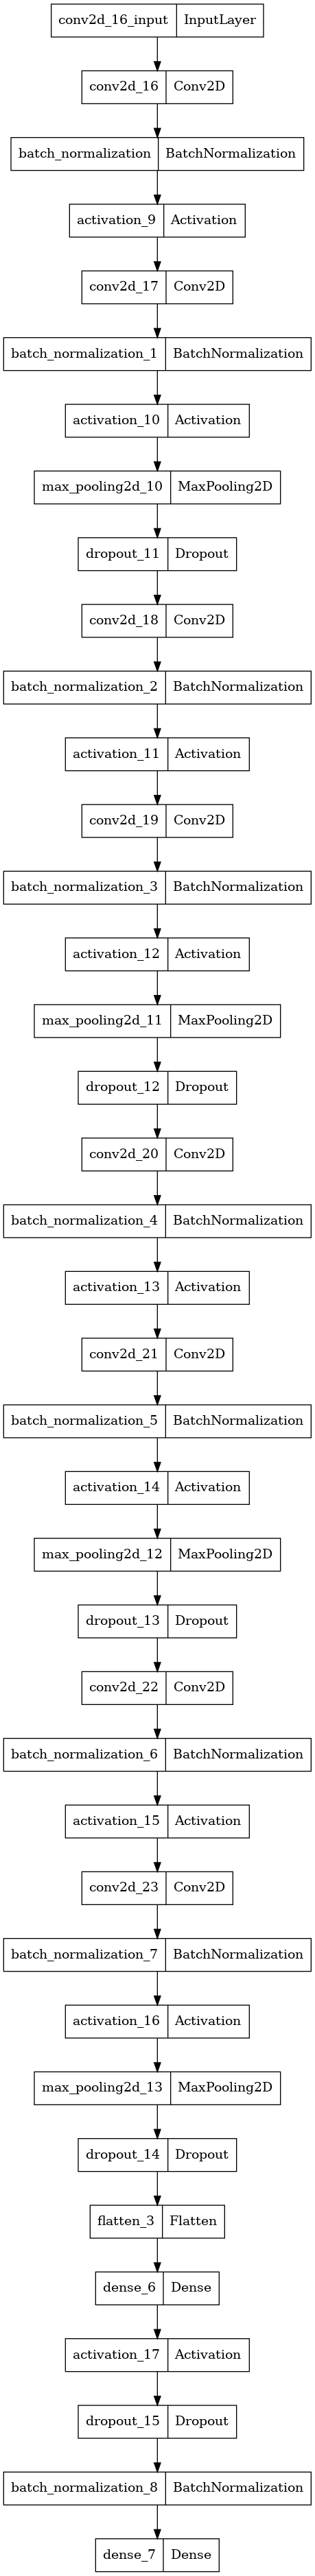

In [38]:
tf.keras.utils.plot_model(model2_v2, to_file = "./model/model2_v2.png")


In [39]:
model2_v2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation_9 (Activation)   (None, 32, 32, 256)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_10 (Activation)  (None, 32, 32, 256)      

### Fit Model

Validation set is a subset from the orginal training set

In [40]:



'''
RUNTIME WARNING:
    DATAGEN FLOW
        approximately ? hours for 8 core cpu

    tf.data
        approximately 478 minutes on 8 core CPU
'''



model2_v2_history =  model2_v2.fit (
    #---------------------------------
    #    DATAGEN FLOW - Don't Use
    #---------------------------------
    # datagen.flow(
    #     x_train, 
    #     y_train_onehot, 
    #     batch_size=128,
    #     subset='training'
    # ),
    # validation_data=datagen.flow(
    #     x_train, 
    #     y_train_onehot,
    #     batch_size=128, 
    #     subset='validation'
    # ),

    # -------------------------------
    #    tf.data flow - Much Faster
    # -------------------------------
    train_data,
    validation_data = validation_data, 
    validation_steps=3,
    steps_per_epoch=100,


    epochs = 50,
    verbose = 1,
)



Epoch 1/50
100/100 [==============================] - 538s 5s/step - loss: 1.1938 - accuracy: 0.7563 - val_loss: 5.6402 - val_accuracy: 0.0000e+00
Epoch 2/50


2023-02-12 08:43:30.890882: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 540s 5s/step - loss: 0.0330 - accuracy: 0.9972 - val_loss: 6.8097 - val_accuracy: 0.0156
Epoch 3/50


2023-02-12 08:52:31.147519: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 532s 5s/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 7.3738 - val_accuracy: 0.0052
Epoch 4/50


2023-02-12 09:01:22.890471: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 528s 5s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 7.8433 - val_accuracy: 0.0208
Epoch 5/50


2023-02-12 09:10:10.919193: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 528s 5s/step - loss: 9.4854e-04 - accuracy: 1.0000 - val_loss: 7.8893 - val_accuracy: 0.0052
Epoch 6/50


2023-02-12 09:18:58.999277: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 533s 5s/step - loss: 6.6392e-04 - accuracy: 1.0000 - val_loss: 8.1939 - val_accuracy: 0.0208
Epoch 7/50


2023-02-12 09:27:52.366947: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 546s 5s/step - loss: 4.9105e-04 - accuracy: 1.0000 - val_loss: 8.3821 - val_accuracy: 0.0156
Epoch 8/50


2023-02-12 09:36:58.382353: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 569s 6s/step - loss: 4.5245e-04 - accuracy: 1.0000 - val_loss: 8.3204 - val_accuracy: 0.0260
Epoch 9/50


2023-02-12 09:46:27.165389: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 574s 6s/step - loss: 3.7204e-04 - accuracy: 1.0000 - val_loss: 8.4089 - val_accuracy: 0.0573
Epoch 10/50


2023-02-12 09:56:01.406761: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 582s 6s/step - loss: 3.2205e-04 - accuracy: 1.0000 - val_loss: 8.8434 - val_accuracy: 0.0156
Epoch 11/50


2023-02-12 10:05:43.578389: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 581s 6s/step - loss: 3.0316e-04 - accuracy: 1.0000 - val_loss: 8.4399 - val_accuracy: 0.0417
Epoch 12/50


2023-02-12 10:15:25.014813: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 585s 6s/step - loss: 2.8148e-04 - accuracy: 1.0000 - val_loss: 8.7170 - val_accuracy: 0.0208
Epoch 13/50


2023-02-12 10:25:10.210844: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 582s 6s/step - loss: 2.4785e-04 - accuracy: 1.0000 - val_loss: 9.0145 - val_accuracy: 0.0208
Epoch 14/50


2023-02-12 10:34:52.030899: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 589s 6s/step - loss: 2.2550e-04 - accuracy: 1.0000 - val_loss: 8.5691 - val_accuracy: 0.0417
Epoch 15/50


2023-02-12 10:44:40.929696: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 573s 6s/step - loss: 2.0469e-04 - accuracy: 1.0000 - val_loss: 9.0469 - val_accuracy: 0.0365
Epoch 16/50


2023-02-12 10:54:13.631460: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 572s 6s/step - loss: 1.9490e-04 - accuracy: 1.0000 - val_loss: 8.8978 - val_accuracy: 0.0312
Epoch 17/50


2023-02-12 11:03:45.157288: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 577s 6s/step - loss: 1.9257e-04 - accuracy: 1.0000 - val_loss: 9.1769 - val_accuracy: 0.0417
Epoch 18/50


2023-02-12 11:13:22.524319: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 585s 6s/step - loss: 1.6811e-04 - accuracy: 1.0000 - val_loss: 9.0412 - val_accuracy: 0.0208
Epoch 19/50


2023-02-12 11:23:07.557272: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 588s 6s/step - loss: 1.6274e-04 - accuracy: 1.0000 - val_loss: 8.7935 - val_accuracy: 0.0312
Epoch 20/50


2023-02-12 11:32:55.160863: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 589s 6s/step - loss: 1.4300e-04 - accuracy: 1.0000 - val_loss: 8.4490 - val_accuracy: 0.0521
Epoch 21/50


2023-02-12 11:42:44.482202: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 578s 6s/step - loss: 1.4407e-04 - accuracy: 1.0000 - val_loss: 9.2203 - val_accuracy: 0.0156
Epoch 22/50


2023-02-12 11:52:22.193306: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 583s 6s/step - loss: 1.3888e-04 - accuracy: 1.0000 - val_loss: 9.0139 - val_accuracy: 0.0312
Epoch 23/50


2023-02-12 12:02:04.770512: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 582s 6s/step - loss: 1.2951e-04 - accuracy: 1.0000 - val_loss: 9.2308 - val_accuracy: 0.0260
Epoch 24/50


2023-02-12 12:11:47.232804: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 566s 6s/step - loss: 1.2563e-04 - accuracy: 1.0000 - val_loss: 9.3556 - val_accuracy: 0.0312
Epoch 25/50


2023-02-12 12:21:13.688634: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 563s 6s/step - loss: 1.2452e-04 - accuracy: 1.0000 - val_loss: 9.6096 - val_accuracy: 0.0365
Epoch 26/50


2023-02-12 12:30:36.990555: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 563s 6s/step - loss: 1.1307e-04 - accuracy: 1.0000 - val_loss: 9.1691 - val_accuracy: 0.0260
Epoch 27/50


2023-02-12 12:39:59.880087: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 564s 6s/step - loss: 1.1449e-04 - accuracy: 1.0000 - val_loss: 8.6592 - val_accuracy: 0.0521
Epoch 28/50


2023-02-12 12:49:23.763857: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 564s 6s/step - loss: 1.0584e-04 - accuracy: 1.0000 - val_loss: 9.2088 - val_accuracy: 0.0208
Epoch 29/50


2023-02-12 12:58:48.155568: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 574s 6s/step - loss: 1.0236e-04 - accuracy: 1.0000 - val_loss: 9.2165 - val_accuracy: 0.0312
Epoch 30/50


2023-02-12 13:08:22.193452: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 587s 6s/step - loss: 9.8652e-05 - accuracy: 1.0000 - val_loss: 9.0949 - val_accuracy: 0.0156
Epoch 31/50


2023-02-12 13:18:09.084165: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 575s 6s/step - loss: 9.5555e-05 - accuracy: 1.0000 - val_loss: 9.2396 - val_accuracy: 0.0521
Epoch 32/50


2023-02-12 13:27:44.122087: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 575s 6s/step - loss: 9.2333e-05 - accuracy: 1.0000 - val_loss: 9.1168 - val_accuracy: 0.0365
Epoch 33/50


2023-02-12 13:37:18.865771: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 579s 6s/step - loss: 9.5991e-05 - accuracy: 1.0000 - val_loss: 8.7877 - val_accuracy: 0.0469
Epoch 34/50


2023-02-12 13:46:57.938154: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 577s 6s/step - loss: 8.8345e-05 - accuracy: 1.0000 - val_loss: 9.4932 - val_accuracy: 0.0312
Epoch 35/50


2023-02-12 13:56:35.270837: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 578s 6s/step - loss: 8.3735e-05 - accuracy: 1.0000 - val_loss: 8.9147 - val_accuracy: 0.0469
Epoch 36/50


2023-02-12 14:06:13.424633: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 574s 6s/step - loss: 8.1749e-05 - accuracy: 1.0000 - val_loss: 8.9861 - val_accuracy: 0.0417
Epoch 37/50


2023-02-12 14:15:47.913913: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 581s 6s/step - loss: 8.0277e-05 - accuracy: 1.0000 - val_loss: 9.4426 - val_accuracy: 0.0312
Epoch 38/50


2023-02-12 14:25:29.114989: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 587s 6s/step - loss: 8.2701e-05 - accuracy: 1.0000 - val_loss: 9.4144 - val_accuracy: 0.0469
Epoch 39/50


2023-02-12 14:35:16.505964: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 580s 6s/step - loss: 7.4491e-05 - accuracy: 1.0000 - val_loss: 9.1262 - val_accuracy: 0.0469
Epoch 40/50


2023-02-12 14:44:56.751977: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 575s 6s/step - loss: 7.6085e-05 - accuracy: 1.0000 - val_loss: 9.7970 - val_accuracy: 0.0260
Epoch 41/50


2023-02-12 14:54:31.889894: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 586s 6s/step - loss: 7.7150e-05 - accuracy: 1.0000 - val_loss: 9.2854 - val_accuracy: 0.0469
Epoch 42/50


2023-02-12 15:04:17.867892: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 575s 6s/step - loss: 6.8582e-05 - accuracy: 1.0000 - val_loss: 9.2286 - val_accuracy: 0.0260
Epoch 43/50


2023-02-12 15:13:53.282197: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 589s 6s/step - loss: 6.9126e-05 - accuracy: 1.0000 - val_loss: 9.3609 - val_accuracy: 0.0260
Epoch 44/50


2023-02-12 15:23:42.445634: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 599s 6s/step - loss: 6.7161e-05 - accuracy: 1.0000 - val_loss: 9.0312 - val_accuracy: 0.0312
Epoch 45/50


2023-02-12 15:33:41.318997: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 597s 6s/step - loss: 6.5364e-05 - accuracy: 1.0000 - val_loss: 9.1769 - val_accuracy: 0.0260
Epoch 46/50


2023-02-12 15:43:38.510525: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 593s 6s/step - loss: 6.3664e-05 - accuracy: 1.0000 - val_loss: 9.6773 - val_accuracy: 0.0156
Epoch 47/50


2023-02-12 15:53:31.338843: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 602s 6s/step - loss: 6.3612e-05 - accuracy: 1.0000 - val_loss: 9.4551 - val_accuracy: 0.0312
Epoch 48/50


2023-02-12 16:03:33.335165: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 595s 6s/step - loss: 6.6024e-05 - accuracy: 1.0000 - val_loss: 9.1579 - val_accuracy: 0.0521
Epoch 49/50


2023-02-12 16:13:28.816084: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 594s 6s/step - loss: 6.2934e-05 - accuracy: 1.0000 - val_loss: 9.3055 - val_accuracy: 0.0365
Epoch 50/50


2023-02-12 16:23:22.653806: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


100/100 [==============================] - 584s 6s/step - loss: 5.8339e-05 - accuracy: 1.0000 - val_loss: 9.4950 - val_accuracy: 0.0312


2023-02-12 16:33:06.160996: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### History

In [41]:

plot_accuracy_and_loss(model2_v2_history.history)

### Save Model

In [42]:
filepath = f"./img_classifier_{MODEL_NO}/{VERSION_NO}/"
model2_v1.save(
    filepath=filepath, 
    save_format='tf',
)

INFO:tensorflow:Assets written to: ./img_classifier_2/2/assets


INFO:tensorflow:Assets written to: ./img_classifier_2/2/assets


In [43]:
# LOAD BATCH NORM MODEL
model2_v2 = tf.keras.models.load_model(filepath)

### Evaluation

In [44]:
scores = model2_v2.evaluate(X_test_normalised, Y_test_onehot)
print(f'accuracy on test set: {model2_v2.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 336s 1s/step - loss: 862.3457 - accuracy: 0.0118
accuracy on test set: accuracy of 1.1800000444054604
